In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

functions = ['sine', 'cosine', 'expo', 'tangent']
operator = ['+', '-', 'x', '/']

t = np.arange(start=0, stop=2 ,step=2e-2)       # [0, ..., 1.98]
epsilon = 1e-10

def get_function(func_idx):
    if func_idx in np.arange(0, 4, step=1):
        noise = np.random.normal(0, 0.1, t.shape)
        if functions[func_idx] == 'sine':
            phase = np.random.uniform(0, 2*np.pi)
            return np.sin(2*np.pi*t + phase) * np.random.randint(1, 4)
        elif functions[func_idx] == 'cosine':
            phase = np.random.uniform(0, 2*np.pi)
            return np.cos(2*np.pi*t + phase) * np.random.randint(1, 4)
        elif functions[func_idx] == 'expo':
            return np.exp(-t) * np.random.randint(3)
        # elif functions[func_idx] == 'tangent':
        #     return np.tan(np.pi * t) * np.random.randint(1, 4) + noise

def write_csv(df, count, is_Train=True):
    output_dir = './raw_data'
    # Create CSV
    if is_Train:
        output_dir = os.path.join(output_dir, 'train')
        os.makedirs(output_dir, exist_ok=True)
        file_name = os.path.join(output_dir, f'{count}.txt')
    else:
        output_dir = os.path.join(output_dir, 'test')
        os.makedirs(output_dir, exist_ok=True)
        file_name = os.path.join(output_dir, f'test.txt')

    df.to_csv(file_name,header=False, index=False, sep=' ')

    # 如果存在同名字问价，读入该数据文件
    with open(file_name, "r") as file:
        existing_content = file.read()

    # 加 ADS, TIM 支持的 Header 
    new_content = "BEGIN TIMEDATA\n% time(real) voltage(real)\n"

    with open(file_name, "w") as file:
        # Write the new content followed by the existing content
        file.write(new_content + existing_content)

    # 加 ADS, TIM 支持的 Footer 
    with open(file_name, "a") as file:
        file.write("END")

# Train Set

function : sine x expo
function : cosine x expo
function : sine x expo
function : sine + expo
function : expo + expo
function : sine - sine
function : sine + expo
function : expo + cosine
function : expo x expo
function : cosine - expo
function : cosine x cosine
function : sine - expo
function : expo - sine
function : cosine x cosine
function : sine x sine
function : sine - cosine
function : cosine + expo
function : cosine + cosine
function : cosine x sine
function : sine x expo
function : sine - expo
function : sine + expo
function : sine + expo
function : expo - sine
function : expo - cosine
function : sine - cosine
function : cosine x cosine
function : expo - expo
function : sine + expo


C:\Users\User\AppData\Local\Temp\ipykernel_24904\1306856853.py:27: RuntimeWarning: invalid value encountered in divide
  normalized_f = 2 * (combined_f - min_val) / (max_val - min_val) - 1


function : sine - expo
function : cosine - sine
function : cosine x cosine
function : sine + sine
function : sine x cosine
function : cosine x expo
function : sine x expo
function : cosine + cosine
function : expo x sine
function : expo x cosine
function : cosine x cosine
function : expo + expo
function : sine x cosine
function : sine + sine
function : cosine - expo
function : sine + sine
function : sine + expo
function : cosine - sine
function : expo + expo
function : expo - cosine
function : expo x sine


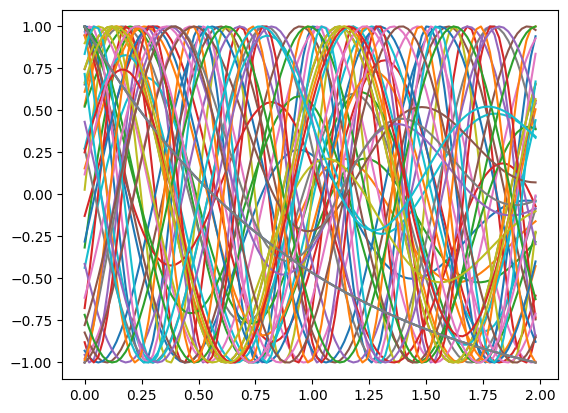

In [6]:
count = 0
for _ in range(50):
    f1_idx, f2_idx = np.random.randint(3), np.random.randint(3)
    f1, f2 = get_function(f1_idx), get_function(f2_idx)
    
    op = np.random.randint(3)
    if op == 0:
        combined_f = f1 + f2
    elif op == 1:
        combined_f = f1 - f2
    elif op == 2:
        combined_f = f1 * f2

    # Save result to txt file
    # 把时间和随机输入电压成一个矩阵
    c = np.column_stack((t,combined_f))
    df = pd.DataFrame(c)
    
    # Create CSV
    write_csv(df, count)
    count += 1

    # Plot result
    # Normalize to [-1, 1]
    min_val = np.min(combined_f)
    max_val = np.max(combined_f)
    normalized_f = 2 * (combined_f - min_val) / (max_val - min_val) - 1

    plt.plot(t, normalized_f)
    print(f'function : {functions[f1_idx]} {operator[op]} {functions[f2_idx]}')

function : sine + cosine + expo
function : sine + expo - sine
function : sine + cosine - expo
function : cosine x expo + cosine
function : cosine + expo + expo


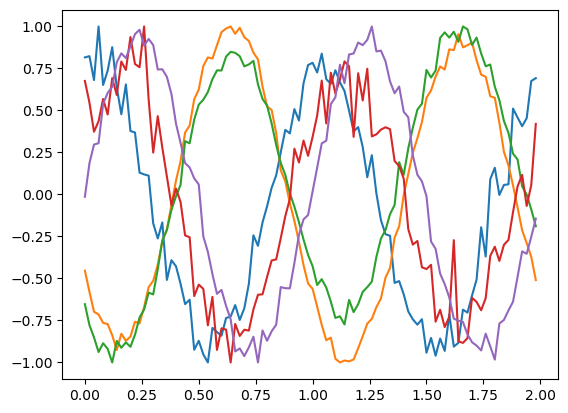

In [45]:
# Test Set
count = 0
for i in range(5):
    f1_idx, f2_idx, f3_idx = np.random.randint(3), np.random.randint(3), np.random.randint(3)
    f1, f2, f3 = get_function(f1_idx), get_function(f2_idx), get_function(f3_idx)
    
    op1, op2 = np.random.randint(3), np.random.randint(3)

    if op1 == 0:
        combined_f = f1 + f2
    elif op1 == 1:
        combined_f = f1 - f2
    elif op1 == 2:
        combined_f = f1 * f2

    if op2 == 0:
        combined_f = combined_f + f3
    elif op2 == 1:
        combined_f = combined_f - f3
    elif op2 == 2:
        combined_f = combined_f * f3
        
    # # Save result to txt file
    # # 把时间和随机输入电压成一个矩阵
    # c = np.column_stack((t,combined_f))
    # df = pd.DataFrame(c)
    
    # # Create CSV
    # write_csv(df, count, is_Train=False)
    # count += 1

    # Plot result
    # Normalize to [-1, 1]
    min_val = np.min(combined_f)
    max_val = np.max(combined_f)
    normalized_f = 2 * (combined_f - min_val) / (max_val - min_val) - 1

    plt.plot(t, normalized_f)
    print(f'function : {functions[f1_idx]} {operator[op1]} {functions[f2_idx]} {operator[op2]} {functions[f3_idx]}')
    